In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 

# DECISION TREE

- Tree Structure: Decision Tree resembles a tree with nodes, branches, and leaves.
- Feature Splitting: Decision Tree selects feature thresholds to split data into subsets.
- Decision Rules: Each node represents a decision based on feature values.
- Traversing the Tree: Data traverse from root to leaf node based on decisions.
- Prediction: Leaf node assigns class label or continuous value for prediction.

In [3]:
# Import dataset
df = pd.read_csv(r"E:\HSNC\SEM 2\ML\bank.csv")

In [4]:
df.head(5)

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [29]:
# Info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.7+ KB


In [30]:
# Checking the dependent variable distribution
# In this we can see the data is very much inclined towards "YES", which will result in biased model.
# Thus this is a Imbalanced Dataset.
df['subscribed'].value_counts(normalize = True)

no     0.88476
yes    0.11524
Name: subscribed, dtype: float64

In [6]:
# Now to handle Imbalance data we can either Upsample it or Downsample it.
# Upsample data means to increase the number of attribute which is less.
# Downsample means to decrease the number of attribute that is more.

from sklearn.utils import resample
# Seperate the case of yes-no subscribe and no-subscribe
bank_subs_no = df[df.subscribed == 'no']
bank_subs_yes = df[df.subscribed == 'yes']
    
# Upsample the yes-subs cases
# This can be done with the help of resample function.
df_minority_upsampled = resample(bank_subs_yes,replace =True, n_samples = 2000)
    
# Combine majority class with upsampled minority class
new_df = pd.concat([bank_subs_no, df_minority_upsampled])

In [7]:
new_df

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...
494,44,technician,single,secondary,no,244,yes,no,4,0,yes
509,30,blue-collar,single,secondary,no,315,no,no,1,0,yes
1269,27,technician,single,secondary,no,158,no,no,2,0,yes
4275,53,management,married,tertiary,no,15,no,no,2,0,yes


In [8]:
# Converting categorical data to numeric for model building.
# Independent variable
X = pd.get_dummies(new_df[['age','job','marital','education','default','balance','housing-loan', 'personal-loan','current-campaign','previous-campaign']])

In [13]:
# Dependent vatiable
Y = new_df.replace(to_replace = ['yes','no'],value=[1,0])['subscribed']

In [14]:
# StandardScaler is used for standardization
# Standardization means it scales the features (variables) so that they have a mean of 0 and a standard deviation of 1.
from sklearn import preprocessing
X1 = preprocessing.StandardScaler().fit(X).transform(X)

In [15]:
# Initializing training and testing data
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,Y,test_size=0.25,random_state = 1)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
# Training the a Decision Tree model
# Using Gini index
clf_gini=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=3,min_samples_leaf=5)
clf_gini.fit(x1_train,y1_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [18]:
from sklearn import tree
print(tree.export_text(clf_gini))

|--- feature_3 <= -0.11
|   |--- feature_0 <= 1.67
|   |   |--- feature_17 <= -0.19
|   |   |   |--- class: 0
|   |   |--- feature_17 >  -0.19
|   |   |   |--- class: 0
|   |--- feature_0 >  1.67
|   |   |--- feature_2 <= -0.06
|   |   |   |--- class: 1
|   |   |--- feature_2 >  -0.06
|   |   |   |--- class: 1
|--- feature_3 >  -0.11
|   |--- feature_26 <= -0.06
|   |   |--- feature_5 <= 0.81
|   |   |   |--- class: 1
|   |   |--- feature_5 >  0.81
|   |   |   |--- class: 0
|   |--- feature_26 >  -0.06
|   |   |--- feature_0 <= 1.67
|   |   |   |--- class: 0
|   |   |--- feature_0 >  1.67
|   |   |   |--- class: 1



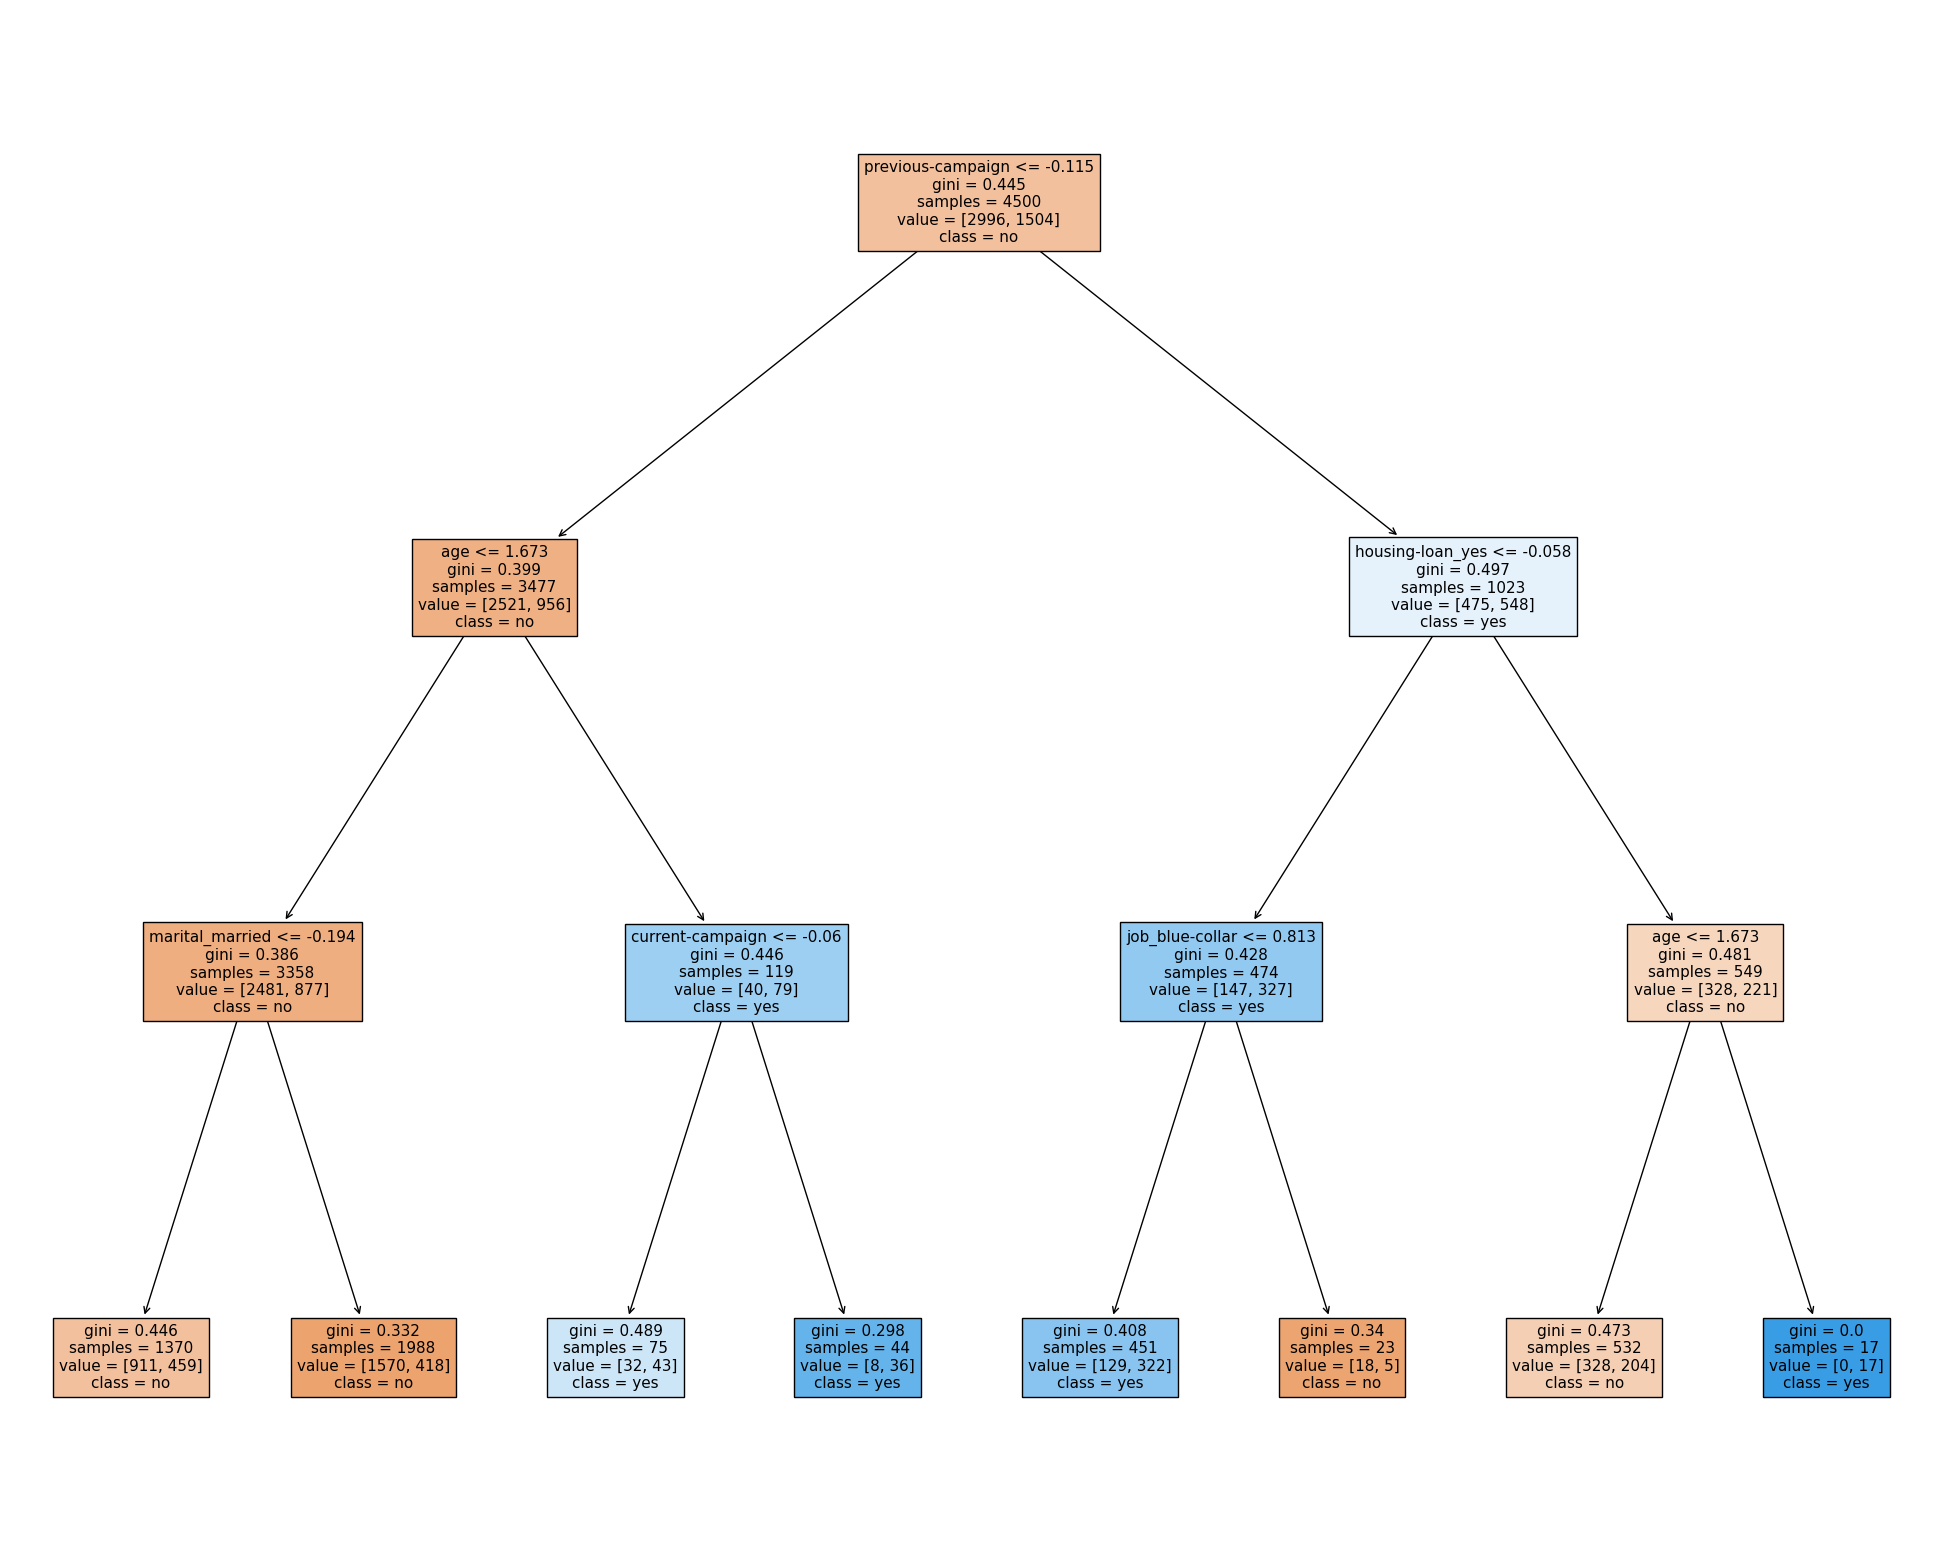

In [19]:
fig=plt.figure(figsize=(25,20))
tree.plot_tree(clf_gini,feature_names= list(X.columns),class_names=['no','yes'],filled=True)
plt.show()

In [20]:
# Using entropy
clf_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(x1_train,y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [21]:
from sklearn import metrics

pred_y=clf_entropy.predict(x1_test)
metrics.accuracy_score(y1_test,pred_y)

0.7173333333333334

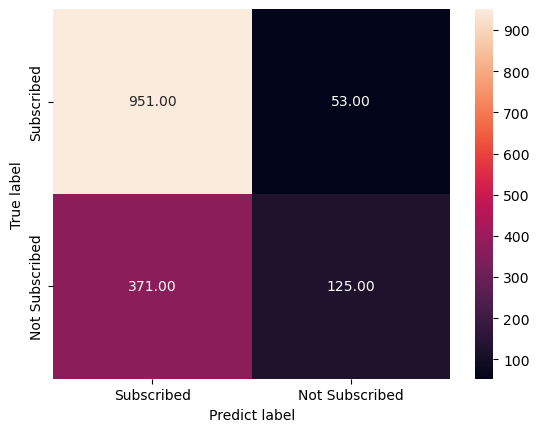

In [31]:
cm=metrics.confusion_matrix(y1_test,pred_y)
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Subscribed','Not Subscribed'], yticklabels = ['Subscribed', 'Not Subscribed'])
plt.ylabel('True label')
plt.xlabel('Predict label')
plt.show()

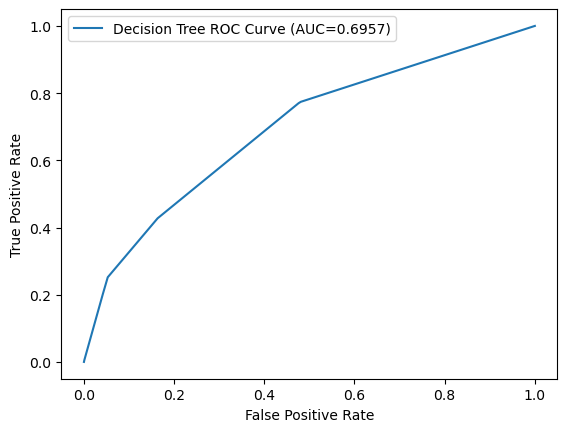

In [23]:
y_prob=clf_entropy.predict_proba(x1_test)
y_prob
fpr=metrics.roc_curve(y1_test,y_prob[:,1])[0]
tpr=metrics.roc_curve(y1_test,y_prob[:,1])[1]
dt_auc=metrics.roc_auc_score(y1_test,y_prob[:,1])
plt.plot(fpr,tpr,label='Decision Tree ROC Curve (AUC=%.4f)' % (dt_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
hyperparameters = [{'criterion':["gini","entropy"],'max_depth': range(3,20), 'min_samples_leaf': range(5,10)}]

In [26]:
optimal_parameter_model = GridSearchCV(DecisionTreeClassifier(), hyperparameters, cv = 10, scoring = 'roc_auc')

In [27]:
optimal_parameter_model.fit(x1_train,y1_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(3, 20),
                          'min_samples_leaf': range(5, 10)}],
             scoring='roc_auc')

In [28]:
print("Best Score: ", optimal_parameter_model.best_score_)
print("Optimal parameters:", optimal_parameter_model.best_params_)

Best Score:  0.8654594935780539
Optimal parameters: {'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 5}
